$$\frac{\partial \Psi}{\partial \tau}=\frac{1}{2}\left [ \frac{1}{r}\frac{\partial \Psi}{\partial r}+
\frac{\partial^2 \Psi}{\partial r^2}+\frac{1}{r^2}\frac{\partial^2 \Psi}{\partial \theta^2} \right ]$$

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from matplotlib import cm

In [2]:
NR = 50
NA = 50

R = 1
dr = R/NR

pi = 2*math.asin(1.0)

# da = 2.0*np.pi/NA
da = 2.0*pi/NA

r = np.arange(NR+1)*dr

In [3]:
psi_c = pd.read_csv("results_5050_36500.csv", header=None)
psi = psi_c.to_numpy()

# Energi -> Cara 1

In [4]:
# Menghitung energi

pembilang = 0.0
penyebut = 0.0

for i in range(1, NR):
    for j in range(1, NA):
        pembilang += psi[i,j]*psi[i,j]
        
        d2psi = -0.5*(psi[i+1, j] - psi[i-1, j])/(r[i]*2*dr)
        d2psi += -0.5*(psi[i-1, j] - 2*psi[i, j] + psi[i+1, j])/(dr*dr)
        d2psi += -0.5*(psi[i, j-1] - 2*psi[i, j] + psi[i, j+1])/(da*da*r[i]*r[i])
        
        penyebut += psi[i,j]*d2psi
        
penyebut *= dr*da
pembilang *= dr*da

energi = penyebut/pembilang
print(energi)

2.4067720800369528


In [5]:
# Normalisasi

#coef = np.sqrt(1.0/pembilang)
#for i in range(1, NR):
#    for j in range(1, NA):
#        psi[i, j] = coef*psi[i,j]

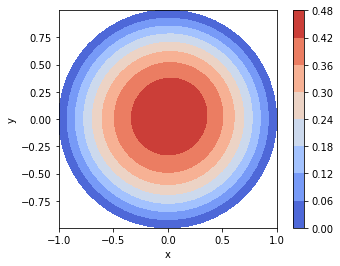

In [7]:
theta = np.linspace(0, 2*pi, NA+1)
X, Y = np.meshgrid(r, theta, sparse =False, indexing = 'ij')
a, b = X*np.cos(Y), X*np.sin(Y)

#plot hasil
plt.contourf(a, b, psi, cmap = cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.gca().set_aspect('equal')
plt.show()

# 